<a href="https://colab.research.google.com/github/kd65541/CST383_project/blob/main/383_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Update : Predicting Students' End-of-Term Performances

Team members

1) Saulloa@csumb.edu
2) nmahanloo@csumb.edu
3) chzavala@csumb.edu
4) doj@csumb.edu


**Introduction**

Our project focuses on utilizing machine learning to predict students' end-of-term performances. By gathering comprehensive data encompassing personal details, study habits, and family support, we aim to construct a predictive model capable of accurately forecasting final grades. Currently, we are in the process of meticulously refining our dataset to identify key variables. As our work progresses, we anticipate uncovering discernible patterns that will enhance the efficacy of our predictive model, potentially offering valuable insights for educators to better support student success.

**Choice of Dataset**

The datasets we've chosen play a vital role in training our model to predict students' GPAs accurately. They capture key aspects of a student's academic journey, from demographics to study habits and external factors. We omitted certain columns that didn't align with our research goals or lacked relevance. By focusing on these essential features, we aim to create a robust model that provides valuable insights for educators and stakeholders alike.


---


The list with the provided numbering system:

1. Student Age (1: 18-21, 2: 22-25, 3: above 26)
3. Graduated high-school type: (1: private, 2: state, 3: other)
4. Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5. Additional work: (1: Yes, 2: No)
6. Regular artistic or sports activity: (1: Yes, 2: No)
7. Do you have a partner: (1: Yes, 2: No)
8. Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
10. Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
17. Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
20. Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21. Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22. Attendance to classes (1: always, 2: sometimes, 3: never)
23. Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24. Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25. Taking notes in classes: (1: never, 2: sometimes, 3: always)
26. Listening in classes: (1: never, 2: sometimes, 3: always)
27. Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
30. Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
32. OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)


---

**What it is you are going to predict**


The goal of our project is to use the information from the dataset to develop a forecast that will give you an accurate prediction of the end-of-term performance of the student.

**What features you plan to use as predictors**


To build an effective predictive model, we'll be using specific features as predictors. These include the student's Grade Point Average (GPA), the number of hours they dedicate to studying each week, their class attendance, how often they take notes during lectures, and their unique STUDENT ID. By considering these key factors, we hope to gain a deeper insight into students' academic behaviors and improve the accuracy of our predictions.








**Preliminary work on data preparation**


*   Data cleaning: Identify missing values and remove unnecessary rows and columns.
*   ---“StandardScaler” and/or “MinMaxScaler” for normalization from “sklearn.preprocessing”
*  Scaling numeric features, since the dataset varies in size
*  Scaling categorical features, we plan on adding value to the non-numeric features

**Preliminary work on data exploration and visualization**

Presenting graphs below based on the dataset, highlighting the correlation with GPA as the primary focus.

In [ ]:
!pip install pandas numpy matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Configure visualizations
sns.set(style='whitegrid')

url = 'https://raw.githubusercontent.com/kd65541/CST383_project/main/archive/StudentsPerformance_with_headers.csv'
df = pd.read_csv(url)

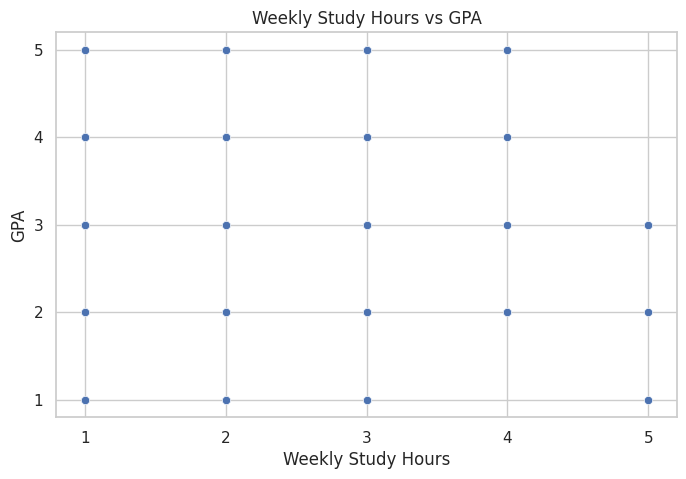

In [ ]:
# Bar graph of Weekly study hours vs GPA
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Weekly study hours', y='Cumulative grade point average in the last semester (/4.00)')
plt.title('Weekly Study Hours vs GPA')
plt.xlabel('Weekly Study Hours')
plt.ylabel('GPA')

# Set x-axis ticks to display integer values only
plt.xticks(range(df['Weekly study hours'].astype(int).min(), df['Weekly study hours'].astype(int).max() + 1))

# Set y-axis ticks to display integer values only
plt.yticks(range(int(df['Cumulative grade point average in the last semester (/4.00)'].min()), int(df['Cumulative grade point average in the last semester (/4.00)'].max()) + 1))

plt.show()


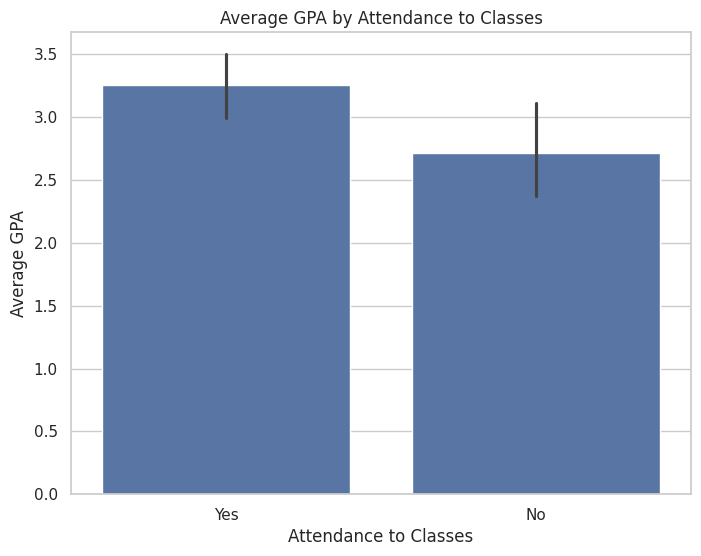

In [ ]:
# Bar plot of average GPA vs attendance to classes
df['Attendance to classes'] = df['Attendance to classes'].replace({1: 'Yes', 2: 'No'})

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Attendance to classes', y='Cumulative grade point average in the last semester (/4.00)')
plt.title('Average GPA by Attendance to Classes')
plt.xlabel('Attendance to Classes')
plt.ylabel('Average GPA')
plt.show()

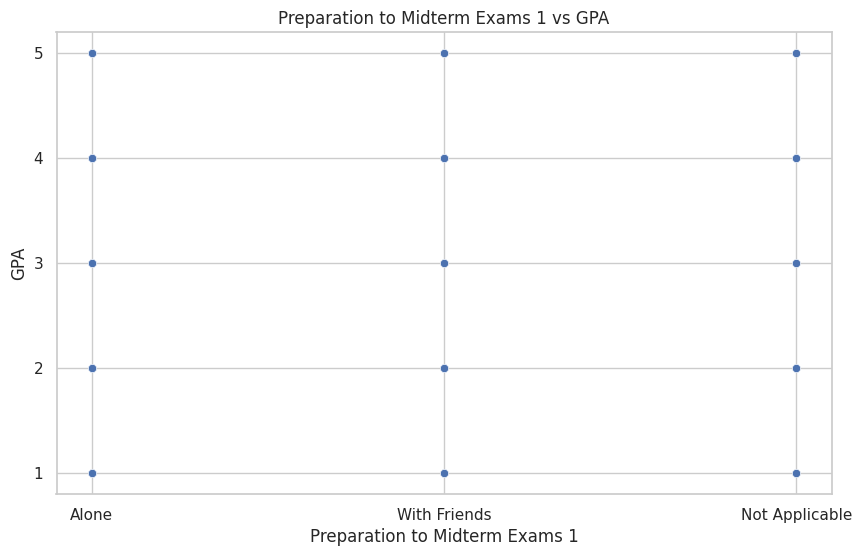

In [ ]:
# Scatter plot of Preparation to midterm exams 1 vs GPA
# Define the mapping of numerical values to categorical labels
preparation_labels = {
    1: 'Alone',
    2: 'With Friends',
    3: 'Not Applicable'
}

# Map numerical values to categorical labels in the DataFrame
df['Preparation to midterm exams 1'] = df['Preparation to midterm exams 1'].map(preparation_labels)

# Scatter plot of Preparation to midterm exams 1 vs GPA with categorical labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Preparation to midterm exams 1', y='Cumulative grade point average in the last semester (/4.00)')
plt.title('Preparation to Midterm Exams 1 vs GPA')
plt.xlabel('Preparation to Midterm Exams 1')
plt.ylabel('GPA')

# Set y-axis ticks to display integer values only
plt.yticks(range(int(df['Cumulative grade point average in the last semester (/4.00)'].min()), int(df['Cumulative grade point average in the last semester (/4.00)'].max()) + 1))

plt.show()


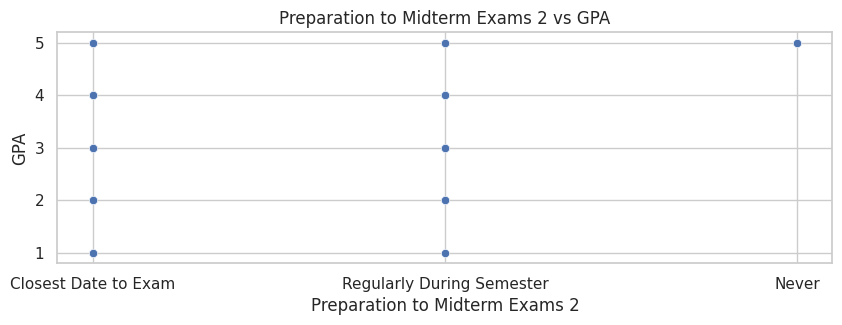

In [ ]:
# Scatter plot of Preparation to midterm exams 2 vs GPA
# Define the mapping of numerical values to categorical labels
preparation_labels_2 = {
    1: 'Closest Date to Exam',
    2: 'Regularly During Semester',
    3: 'Never'
}

# Map numerical values to categorical labels in the DataFrame
df['Preparation to midterm exams 2'] = df['Preparation to midterm exams 2'].map(preparation_labels_2)

# Scatter plot of Preparation to midterm exams 2 vs GPA with categorical labels
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x='Preparation to midterm exams 2', y='Cumulative grade point average in the last semester (/4.00)')
plt.title('Preparation to Midterm Exams 2 vs GPA')
plt.xlabel('Preparation to Midterm Exams 2')
plt.ylabel('GPA')

# Set y-axis ticks to display integer values only
plt.yticks(range(int(df['Cumulative grade point average in the last semester (/4.00)'].min()), int(df['Cumulative grade point average in the last semester (/4.00)'].max()) + 1))

plt.show()


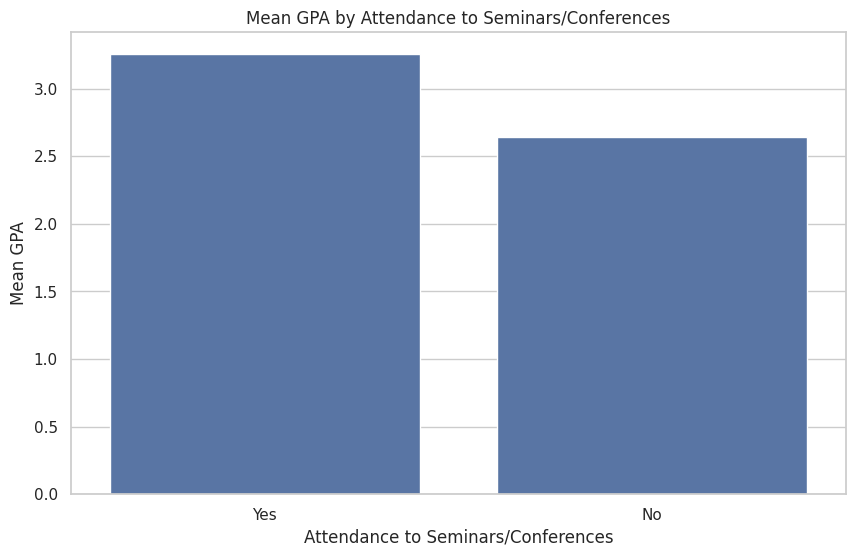

In [ ]:
# Group the DataFrame by 'Attendance to seminars/conferences related to the department' and calculate the mean GPA for each group
gpa_by_attendance = df.groupby('Attendance to the seminars/conferences related to the department')['Cumulative grade point average in the last semester (/4.00)'].mean().reset_index().replace({1: 'Yes', 2: 'No'})

# Plotting the clustered bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=gpa_by_attendance, x='Attendance to the seminars/conferences related to the department', y='Cumulative grade point average in the last semester (/4.00)')
plt.title('Mean GPA by Attendance to Seminars/Conferences')
plt.xlabel('Attendance to Seminars/Conferences')
plt.ylabel('Mean GPA')
plt.show()

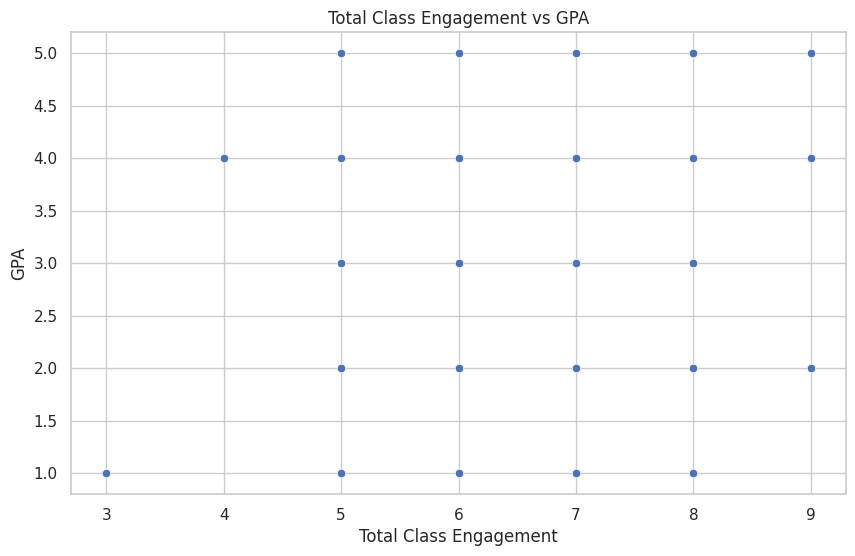

In [ ]:
# Create a new column "Total Class Engagement" by summing up the values from the three columns
df['Total Class Engagement'] = df['Taking notes in classes'] + df['Listening in classes'] + df['Discussion improves my interest and success in the course']

# Scatter plot of Total Class Engagement vs GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Class Engagement', y='Cumulative grade point average in the last semester (/4.00)')
plt.title('Total Class Engagement vs GPA')
plt.xlabel('Total Class Engagement')
plt.ylabel('GPA')
plt.show()


**Preliminary work on machine learning to make predictions**


*   80% of the dataset will be used for training the model
*   20% of the dataset will be reserved for testing.
*   Feature scaling to normalize the non-numeric datasets.
*   May need linear regression for regression tasks
*   May need logistic regression for classification tasks
*   May need k-fold cross-validation on the training set to fine tune hyperparameters and model configuration.
*   May need to use cross-validation techniques to avoid overfitting.


---

Presenting below is preliminary work on machine learning to make predictions





In [ ]:
#separate code

x = df[['Weekly study hours']]
y = df['Cumulative grade point average in the last semester (/4.00)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 1.423700926890088
